In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
df = pd.read_csv("/content/delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
df = df.rename({"Sorting Time": "ST","Delivery Time": "DT"},axis = 1)
df

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<ipython-input-13-819574e97eb5>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='ST',y='DT', data = df,palette = 'Set1')


<Axes: xlabel='ST', ylabel='DT'>

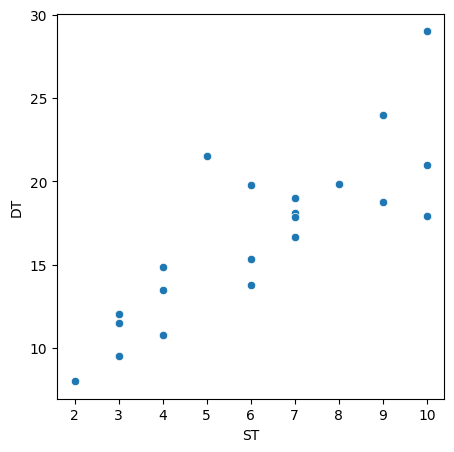

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='ST',y='DT', data = df,palette = 'Set1')

In [ ]:
DF = df.copy()

In [ ]:
DF.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


<ipython-input-16-b6d66f3f0e1f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ST"])


<Axes: xlabel='ST', ylabel='Density'>

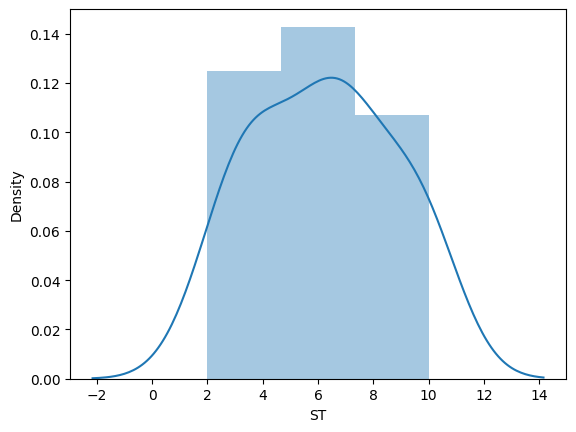

In [ ]:
sns.distplot(df["ST"])

<ipython-input-17-d3177a4233d6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["DT"])


<Axes: xlabel='DT', ylabel='Density'>

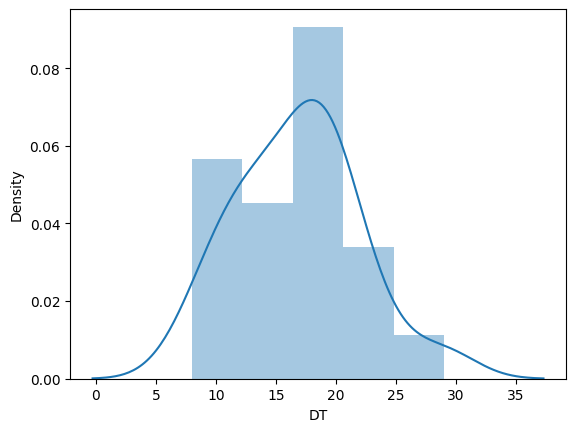

In [ ]:
sns.distplot(df["DT"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f95e1635e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f95e1648400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f95e1635be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f95e1648940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f95e1648be0>],
 'means': []}

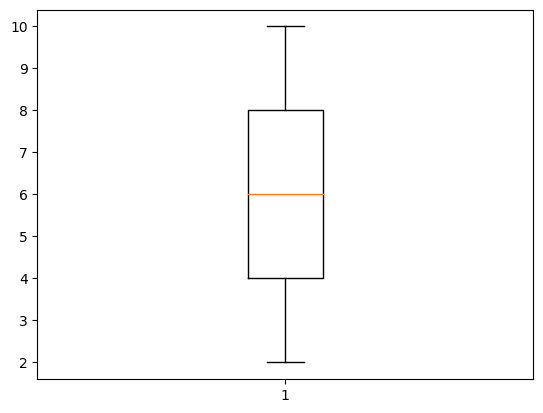

In [ ]:
plt.boxplot(df["ST"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f95e15c31c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f95e15c3700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f95e15b3ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f95e15c3c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f95e15c3ee0>],
 'means': []}

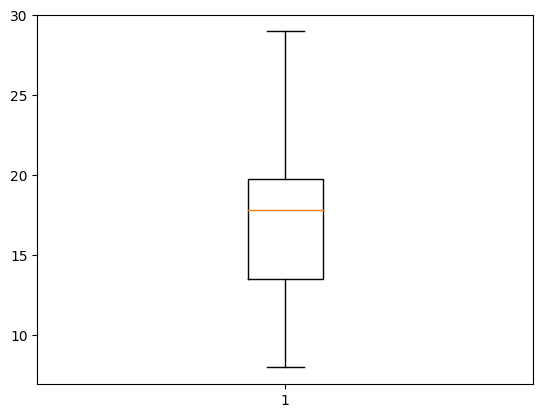

In [ ]:
plt.boxplot(df["DT"])

In [ ]:
Model = smf.ols("DT~ST", data=df).fit()

<Axes: xlabel='ST', ylabel='DT'>

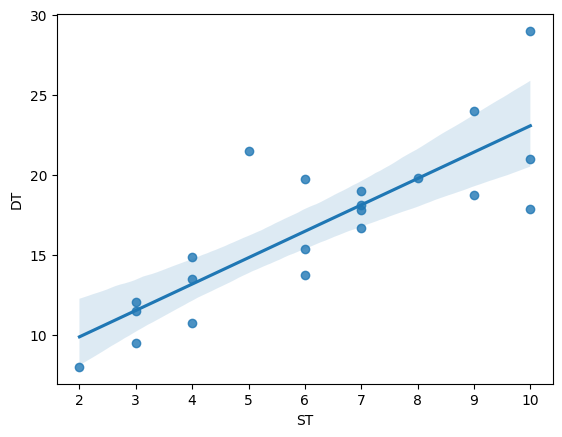

In [ ]:
sns.regplot(x="ST",y="DT",data=df)

In [ ]:
Model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [ ]:
Model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [ ]:
Model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [ ]:
Model.rsquared

0.6822714748417231

In [ ]:
Model.pvalues

Intercept    0.001147
ST           0.000004
dtype: float64

In [ ]:
df["Predicted Value"] = Model.fittedvalues
df

,DT,ST,Predicted Value
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [ ]:
Model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [ ]:
df["Error"] = Model.resid
Model.rsquared

0.6822714748417231

In [ ]:
Model.pvalues

Intercept    0.001147
ST           0.000004
dtype: float64

In [ ]:
df["Error_Sq"] = (df["Error"])**2
df

,DT,ST,Predicted Value,Error,Error_Sq
0,21.00,10,23.072933,-2.072933,4.297051
1,13.50,4,13.178814,0.321186,0.103161
2,19.75,6,16.476853,3.273147,10.713489
3,24.00,9,21.423913,2.576087,6.636224
4,29.00,10,23.072933,5.927067,35.130124
5,15.35,6,16.476853,-1.126853,1.269798
6,19.00,7,18.125873,0.874127,0.764098
7,9.50,3,11.529794,-2.029794,4.120062
8,17.90,10,23.072933,-5.172933,26.759235
9,18.75,9,21.423913,-2.673913,7.149811


In [ ]:
Mean_Squared_Error = df["Error_Sq"].mean()
Mean_Squared_Error

7.793311548584062

In [ ]:
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        18:08:07   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
datalog = DF
datalog.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
datalog=np.log(DF)
datalog.head()

,DT,ST
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


<ipython-input-37-7e938219e347>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datalog['ST'])


<Axes: xlabel='ST', ylabel='Density'>

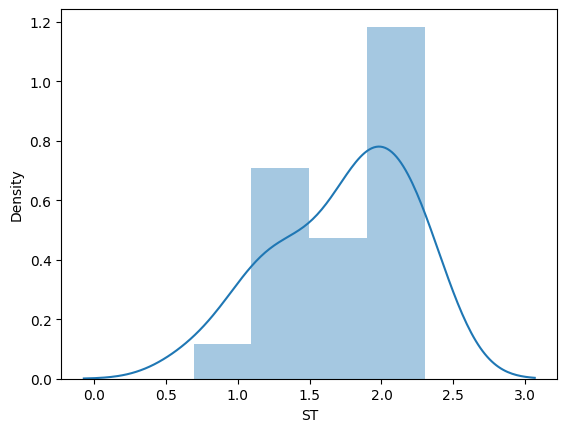

In [ ]:
sns.distplot(datalog['ST'])

<ipython-input-38-cabaff69ed05>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datalog['DT'])


<Axes: xlabel='DT', ylabel='Density'>

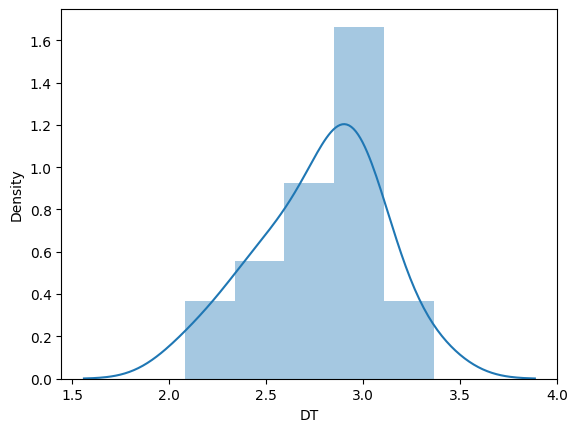

In [ ]:
sns.distplot(datalog['DT'])

In [ ]:
datalog.corr()

,DT,ST
DT,1.000000,0.878727
ST,0.878727,1.000000


<Axes: xlabel='ST', ylabel='DT'>

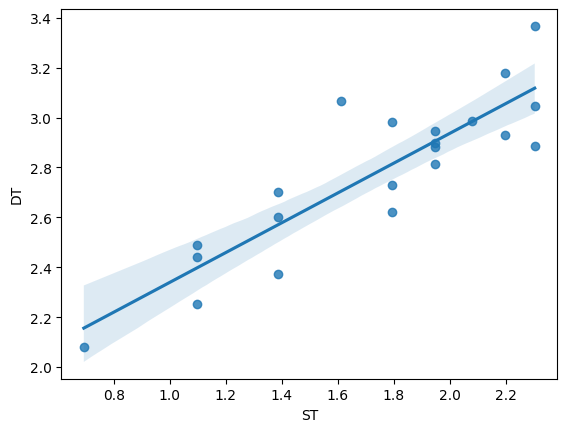

In [ ]:
Model2=smf.ols("DT~ST", data=datalog).fit()
sns.regplot(x="ST",y="DT",data = datalog)

In [ ]:
Model2.pvalues

Intercept    5.921137e-11
ST           1.601539e-07
dtype: float64

In [ ]:
Model2.params

Intercept    1.741987
ST           0.597522
dtype: float64

In [ ]:
Model2.rsquared

0.77216134926874

In [ ]:
Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.60e-07
Time:                        18:10:56   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
ST             0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
datalog['Predicted Value']=Model.fittedvalues
datalog['Error']=Model.resid
datalog

,DT,ST,Predicted Value,Error
0,3.044522,2.302585,23.072933,-2.072933
1,2.602690,1.386294,13.178814,0.321186
2,2.983153,1.791759,16.476853,3.273147
3,3.178054,2.197225,21.423913,2.576087
4,3.367296,2.302585,23.072933,5.927067
5,2.731115,1.791759,16.476853,-1.126853
6,2.944439,1.945910,18.125873,0.874127
7,2.251292,1.098612,11.529794,-2.029794
8,2.884801,2.302585,23.072933,-5.172933
9,2.931194,2.197225,21.423913,-2.673913


In [ ]:
datalog['Error_Sq']=(datalog['Error'])**2
datalog

,DT,ST,Predicted Value,Error,Error_Sq
0,3.044522,2.302585,23.072933,-2.072933,4.297051
1,2.602690,1.386294,13.178814,0.321186,0.103161
2,2.983153,1.791759,16.476853,3.273147,10.713489
3,3.178054,2.197225,21.423913,2.576087,6.636224
4,3.367296,2.302585,23.072933,5.927067,35.130124
5,2.731115,1.791759,16.476853,-1.126853,1.269798
6,2.944439,1.945910,18.125873,0.874127,0.764098
7,2.251292,1.098612,11.529794,-2.029794,4.120062
8,2.884801,2.302585,23.072933,-5.172933,26.759235
9,2.931194,2.197225,21.423913,-2.673913,7.149811


In [ ]:
Mean_Squared_Error=datalog['Error_Sq'].mean()
Mean_Squared_Error

7.793311548584062

In [ ]:
#data square = DS
DS=DF
DS.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<ipython-input-49-31067db31267>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DS['DT'])


<Axes: xlabel='DT', ylabel='Density'>

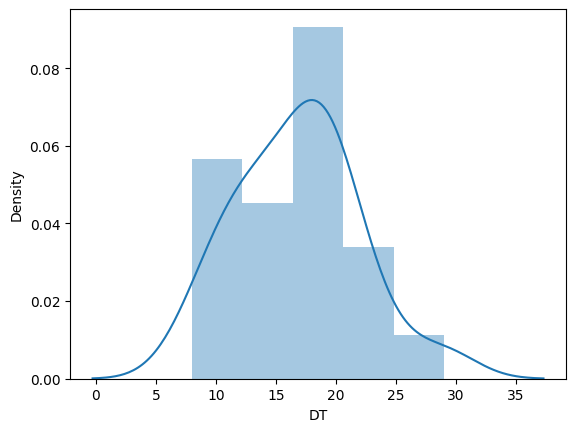

In [ ]:
sns.distplot(DS['DT'])

<ipython-input-50-94ae064ce18a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DS['ST'])


<Axes: xlabel='ST', ylabel='Density'>

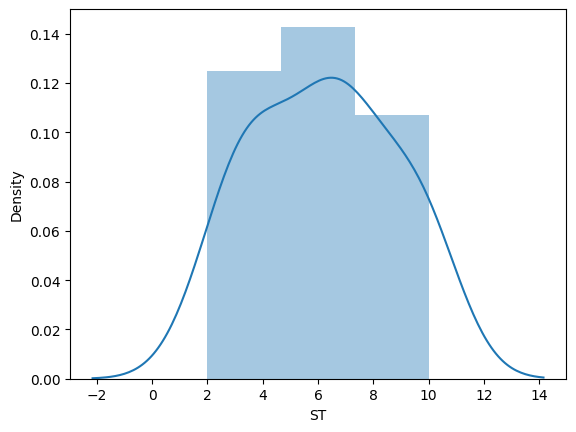

In [ ]:
sns.distplot(DS['ST'])

In [ ]:

DS.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


<Axes: xlabel='ST', ylabel='DT'>

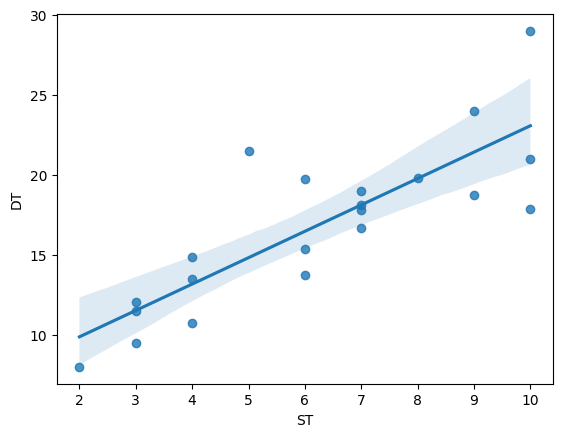

In [ ]:
Model3=smf.ols("DT~ST",data=DS).fit()
sns.regplot(x="ST",y="DT",data = DS)

In [ ]:
Model3.rsquared

0.6822714748417231

In [ ]:
Model3.pvalues

Intercept    0.001147
ST           0.000004
dtype: float64

In [ ]:
Model3.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [ ]:
Model3.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [ ]:
DS['Predicted Value']=Model.fittedvalues
DS['Error']=Model.resid
DS

,DT,ST,Predicted Value,Error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067
5,15.35,6,16.476853,-1.126853
6,19.00,7,18.125873,0.874127
7,9.50,3,11.529794,-2.029794
8,17.90,10,23.072933,-5.172933
9,18.75,9,21.423913,-2.673913


In [ ]:
DS['Error_Sq']=(DS['Error'])**2
DS

,DT,ST,Predicted Value,Error,Error_Sq
0,21.00,10,23.072933,-2.072933,4.297051
1,13.50,4,13.178814,0.321186,0.103161
2,19.75,6,16.476853,3.273147,10.713489
3,24.00,9,21.423913,2.576087,6.636224
4,29.00,10,23.072933,5.927067,35.130124
5,15.35,6,16.476853,-1.126853,1.269798
6,19.00,7,18.125873,0.874127,0.764098
7,9.50,3,11.529794,-2.029794,4.120062
8,17.90,10,23.072933,-5.172933,26.759235
9,18.75,9,21.423913,-2.673913,7.149811


In [ ]:
Mean_Squared_Error=DS['Error_Sq'].mean()
Mean_Squared_Error

7.793311548584062

In [ ]:
Model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        18:16:38   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
DS=DF
DS=np.square(DF)
DS.head()

,DT,ST,Predicted Value,Error,Error_Sq
0,441.0000,100,532.360234,4.297051,18.464647
1,182.2500,16,173.681127,0.103161,0.010642
2,390.0625,36,271.486696,10.713489,114.778846
3,576.0000,81,458.984050,6.636224,44.039469
4,841.0000,100,532.360234,35.130124,1234.125607


<ipython-input-63-31067db31267>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DS['DT'])


<Axes: xlabel='DT', ylabel='Density'>

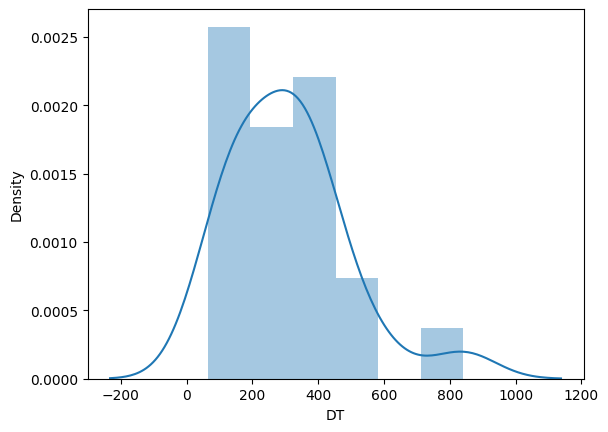

In [ ]:
sns.distplot(DS['DT'])

<ipython-input-64-94ae064ce18a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DS['ST'])


<Axes: xlabel='ST', ylabel='Density'>

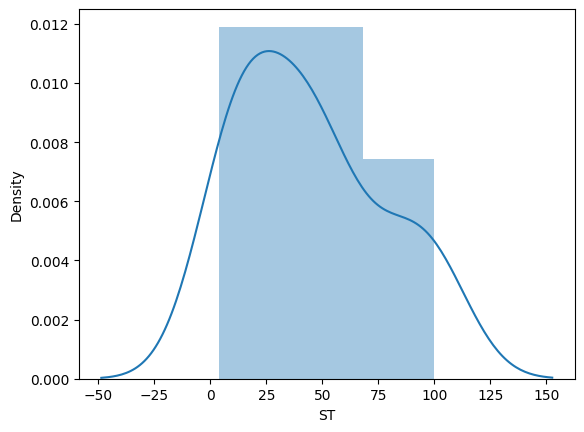

In [ ]:
sns.distplot(DS['ST'])

In [ ]:
DS.corr()

,DT,ST,Predicted Value,Error,Error_Sq
DT,1.000000,0.766934,0.773504,0.570837,0.535132
ST,0.766934,1.000000,0.997608,0.328988,0.215904
Predicted Value,0.773504,0.997608,1.000000,0.319566,0.211152
Error,0.570837,0.328988,0.319566,1.000000,0.966276
Error_Sq,0.535132,0.215904,0.211152,0.966276,1.000000


<Axes: xlabel='ST', ylabel='DT'>

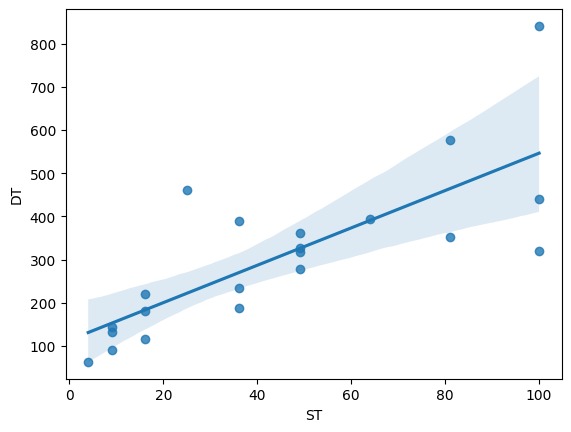

In [ ]:
Model4=smf.ols("DT~ST",data=DS).fit()
sns.regplot(x="ST",y="DT",data = DS)

In [ ]:
Model4.pvalues

Intercept    0.020675
ST           0.000050
dtype: float64

In [ ]:
Model4.params

Intercept    114.154847
ST             4.323874
dtype: float64

In [ ]:
Model4.rsquared

0.5881883446986836

In [ ]:
Model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     27.14
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           4.99e-05
Time:                        18:18:57   Log-Likelihood:                -129.24
No. Observations:                  21   AIC:                             262.5
Df Residuals:                      19   BIC:                             264.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.1548     45.231      2.524      0.021      19.485     208.825
ST             4.3239      0.830      5.209      0.000       2.587       6.061
==============================================================================
Omnibus:                        5.851   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.524
Skew:                           0.865   Prob(JB):                        0.172
Kurtosis:                       4.018   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""